In [1]:
# Import system packages
using Printf
using DelimitedFiles
using Plots
using LaTeXStrings

In [2]:
# Import AGNI
ROOT_DIR = abspath(pwd(),"../")
using AGNI

# Disable logging from AGNI module
AGNI.setup_logging("",1)

In [ ]:
R_earth = 6.371e6
M_earth = 5.972e24
S_earth = 1362.0

T_sun = 5772.0

5772.0

In [7]:
# Generate blackbody for sun
wl_bb, fl_bb = AGNI.spectrum.blackbody_star(T_sun, S_earth)

([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0  …  99991.0, 99992.0, 99993.0, 99994.0, 99995.0, 99996.0, 99997.0, 99998.0, 99999.0, 100000.0], [1.0e-30, 1.0e-30, 1.0e-30, 1.0e-30, 1.0e-30, 1.0e-30, 1.0e-30, 1.0e-30, 1.0e-30, 1.0e-30  …  0.32092391721875363, 0.32091111959710505, 0.32089832261336554, 0.3208855262675008, 0.3208727305594705, 0.3208599354892345, 0.3208471410567615, 0.3208343472620056, 0.32082155410493185, 0.3208087615855034])

In [8]:
# Load sun spectrum
wl_su, fl_su = AGNI.spectrum.load_from_file("../res/stellar_spectra/sun.txt")

([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5  …  60000.0, 80000.0, 100000.0, 120000.0, 150000.0, 200000.0, 250000.0, 300000.0, 400000.0, 1.0e6], [0.002278, 0.1219, 0.01513, 0.02519, 0.03708, 0.0461, 0.04367, 0.03115, 0.02828, 0.01652  …  0.0001743, 5.539e-5, 2.28e-5, 1.102e-5, 4.531e-6, 1.441e-6, 5.916e-7, 2.779e-7, 9.514e-8, 3.184e-9])

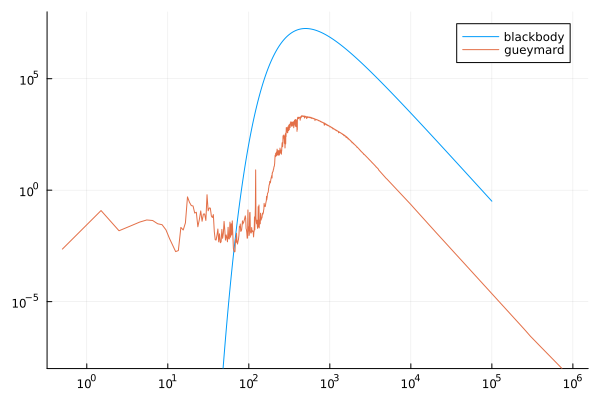

In [15]:
fig = plot(yscale=:log10, xscale=:log10, ylim=(1e-8, 1e8))

plot!(fig, wl_bb, fl_bb, label="blackbody")
plot!(fig, wl_su, fl_su, label="gueymard")

display(fig)